# On-Axis Field of a Finite Solenoid

*This formula uses the formula for the field due to a  [thin shell solenoid](../solenoids/thin_solenoid.html), integrated over a range of radii to obtain the magnetic field at any point on the axis of a finite.*

![Infinite straight wire](solenoid.png)

## General Case

$B = \frac {\mu_o i n}{2 (r_2 - r_1)} \left [  x_2 \ln \left ( \frac {\sqrt{r_2^2 + x_2^2} + r_2}{\sqrt{r_1^2 + x_2^2} + r_1} \right ) - x_1 \ln \left ( \frac {\sqrt{r_2^2 + x_1^2} + r_2}{\sqrt{r_1^2 + x_1^2} + r_1} \right ) \right ]$

**B** is the magnetic field, in teslas, at any point on the axis of the solenoid. The direction of the field is parallel to the solenoid axis.

$\mathbf \mu_o$ is the permeability constant (1.26x10<sup>-6</sup> Hm<sup>-1</sup>)

**i** is the current in the wire, in amperes.

**n** is the number of turns of wire *per unit length* in the solenoid.

**r<sub>1</sub>** is the inner radius of the solenoid, in meters.

**r<sub>1</sub>** is the inner radius of the solenoid, in meters.

**r<sub>2</sub>** is the outer radius of the solenoid, in meters.

**x<sub>1</sub>** and **x<sub>2</sub>** are the distances, on axis, from the ends of the solenoid to the magnetic field measurement point, in meters.

## The "G Factor"

The field can be expressed in a form that separates the unit system, power and winding configuration from the unitless geometry of the coil. This introduces the "G Factor":

$B = \mu_o G \sqrt \frac {P \lambda} {r_1 \rho}$

where **G** is the unitless geometry factor defined as:

$G = \sqrt{\frac {1}{8 \pi \beta (\alpha^2 - 1)}} \left [ (\gamma + \beta) \ln \left ( \frac {\alpha + \sqrt{\alpha^2 + (\gamma + \beta)^2}}{1 + \sqrt{1 + (\gamma + \beta)^2}} \right ) - (\gamma - \beta) \ln \left ( \frac {\alpha + \sqrt{\alpha^2 + (\gamma - \beta)^2}}{1 + \sqrt{1 + (\gamma - \beta)^2}} \right ) \right ]$

where,

$\alpha = \frac {r_2}{r_1}$, $\beta = \frac l {2 r_1}$ and $\gamma = \frac {x_1 + x_2}{2 r_1}$

**P** is the total power consumed by the coil, in watts.

**$\lambda$** is equal to the total conductor cross section area divided by the total coil cross section area, which ranges from 0.6 to 0.8 in typical coils.

**$\rho$** is the conductor resistivity, in units of ohms-length. The length units must match those of **r<sub>1</sub>**.

## Special Case: *x<sub>1</sub>* = -*x<sub>2</sub>*

When the magnetic field measurement point is at the center of the solenoid:

$B = \frac {\mu_o i N}{2(r_2 - r_1)} \ln \left ( \frac {\sqrt{r_2^2 + (\frac l 2)^2} + r_2}{\sqrt{r_1^2 + (\frac l 2)^2} + r_1} \right )$

or...

$B = \frac {\mu_o j l}{2} \ln \left ( \frac {\sqrt{r_2^2 + (\frac l 2)^2} + r_2}{\sqrt{r_1^2 + (\frac l 2)^2} + r_1} \right )$

**j** is the bulk current density in the coil cross section, in amperes per square meter.

**l** is the length of the solenoid, in meters.

**N** is the total number of turns of wire in the coil.

The unitless geometry factor G is simply:

$G = \sqrt \frac {\beta} {2 \pi (\alpha^2 - 1)} \ln \left ( \frac {\alpha + \sqrt{\alpha^2 + \beta^2}} {1 + \sqrt{1 + \beta^2}} \right )$

Note that **G** is maximum when $\alpha=3$ and $\beta=2$. A coil built with a given inner diameter and input power will deliver the highest central field strength when these conditions are met.

## Code Example

The following Python code shows how to use these formulas to calculate magnetic fields.

In [1]:
%matplotlib inline
from scipy.special import ellipk, ellipe, ellipkm1
from numpy import pi, sqrt, linspace, log
from pylab import plot, xlabel, ylabel, suptitle, legend, show

uo = 4E-7*pi     # Permeability constant - units of H/m

# Compute G Factor from unitless parameters
def GFactorUnitless(a, b, g=0.0): # alpha, beta - omit gamma for central
    gpb2 = (g+b)*(g+b)
    gmb2 = (g-b)*(g-b)
    if not g == 0.0:
        sq = sqrt(1/(8*pi*b*(a*a-1)))
        t1 = (g+b)*log((a+sqrt(a*a+gpb2))/(1+sqrt(1+gpb2)))
        t2 = (g-b)*log((a+sqrt(a*a+gmb2))/(1+sqrt(1+gmb2)))
        B = sq*(t1-t2)
    else:
        sq = sqrt(b/2/pi/(a*a-1))
        B = sq*log((a+sqrt(a*a+b*b))/(1+sqrt(1+b*b)))
    return B
        
# Compute G Factor from all dimensions
def GFactor(r1, r2, l, x1=0.0, x2=0.0): # omit x1, x2 to compute central field
    a = r2/r1
    b = l/2/r1
    g = (x1+x2)/2/r1
    return GFactorUnitless(a, b, g)

# Compute B field on axis from unitless dimensions
def BFieldUnitless(power, packing, resistivity, r1, a, b, g=0.0):
    return uo*GFactorUnitless(a, b, g)*sqrt(power*packing/r1/resistivity)

# Compute B field on axis from actual dimensions (x is measurement point - center if none)
def BField(power, packing, resistivity, r1, r2, length, x=0.0): 
    a = r2/r1
    b = length/2/r1
    g = x/r1
    return BFieldUnitless(power, packing, resistivity, r1, a, b, g)

Now let's apply the `B` function to a typical coil. We'll assume copper (at resistivity of 1.68x10<sup>-8</sup> ohm-m) conductors at a packing density of 0.75, inner radius of 1.25 cm, power of 100 W and with supposedly optimal $\alpha$ and $\beta$ of 3 and 2, respectively:

In [2]:
resistivity = 1.68E-8 # ohm-meter
r1 = 0.0125 # meter
packing = 0.75
power = 100.0 # watts
B = BFieldUnitless(power, packing, resistivity, r1, 3, 2)
print("B Field: {:.3} T".format(B))

B Field: 0.107 T


Now try any combination of factors (assuming packing of 0.75 and standard copper conductors) to compute the field:

In [3]:
from ipywidgets import interactive
from IPython.display import display

def B(power, r1, r2, length, x):
    return "{:.3} T".format(BField(power, 0.75, resistivity, r1, r2, length, x))

v = interactive(B, 
    power=(0.0, 200.0, 1), 
    r1 = (0.01, 0.1, 0.001),
    r2 = (0.02, 0.5, 0.001),
    length = (0.01, 2, 0.01),
    x = (0.0, 4, 0.01))
display(v)

'7.68e-05 T'

For a given inner radius, power and winding configuration, the field strength is directly proportional to G. Therefore, we can test the assertion that G is maximum when $\alpha$ is 3 and $\beta$ is 2 by constructing a map of G as a function of $\alpha$ and $\beta$:

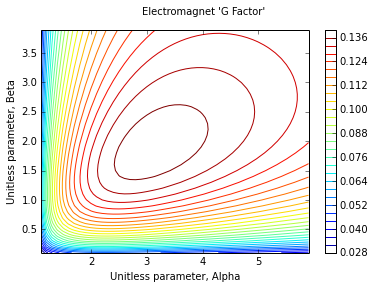

G Factor at A=3, B=2: 0.142
G Factor at A=3, B=1.9: 0.143


In [16]:
from pylab import pcolor, colorbar, meshgrid, contour
from numpy import arange
a = arange(1.1, 6.0, 0.1)
b = arange(0.1, 4.0, 0.1)
A, B = meshgrid(a,b)
G = GFactorUnitless(A, B)
contour(A, B, G, 30)
colorbar()
xlabel("Unitless parameter, Alpha")
ylabel("Unitless parameter, Beta")
suptitle("Electromagnet 'G Factor'")
show()
print("G Factor at A=3, B=2: {:.3}".format(GFactorUnitless(3,2)))
print("G Factor at A=3, B=1.9: {:.3}".format(GFactorUnitless(3,1.9)))

Although it is apparent that the maximum G Factor occurs *near* the $\alpha=3$, $\beta=2$ point, it is not exactly so:

In [14]:
from scipy.optimize import minimize
def GMin(AB):
    return -GFactorUnitless(AB[0], AB[1])

res = minimize(GMin, [3, 2])
print("G Factor is maximum at Alpha = {:.4}, Beta = {:.4}".format(*res.x))

G Factor is maximum at Alpha = 3.096, Beta = 1.862


---
[Magnet Formulas](../index.html), © 2018 by Eric Dennison. Source code and License on [Github](https://github.com/tiggerntatie/emagnet.py)